In [1]:
import stlab
import stlabutils
import numpy as np
import matplotlib.pyplot as plt

In [2]:
foldername = 'B1_2019_07_23_00.16.30_Two-tone-LT142W4_3D_C_40dB-prove_att_40dB-pump_red-sideband_3'
filepath = foldername+'/'+foldername+'.dat'
mydata = stlabutils.readdata.readdat(filepath)

['Frequency (Hz)', 'B_1re ()', 'B_1im ()', 'B_1dB (dB)', 'B_1Ph (rad)', 'Power (dBm)']


In [3]:
for line in mydata:
    line['S21_lin ()'] = (line['B_1re ()']**2 + line['B_1im ()']**2)
# for line in mydata:
#     line['S21_lin ()'] = 10**((line['B_1dB (dB)']-30.)/10.)

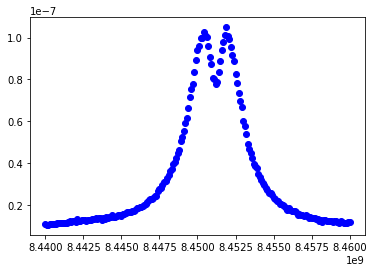

In [12]:
block = mydata[20]
plt.figure()
plt.plot(block['Frequency (Hz)'],block['S21_lin ()'],'bo')
# plt.xlim(8.447e9,8.455e9)
# plt.ylim(-80,-69)
plt.show()
plt.close()

# Tentative fit

In [13]:
from numpy import tan, pi, sqrt
from scipy.optimize import minimize
from scipy.constants import e,h,hbar,k,G,epsilon_0
phi_0 = hbar/2./e
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qutip import *
from scipy import signal
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2

In [14]:
def spectroscopy(wq,Aq,gamma,gamma_phi,Nl_spec,wc,kappa,kappa_out,kappa_in,Nh_spec,power,wd_list,chi,g):
    P = np.power(10.,(float(power)-30.)/10.)  # convert dBm to Watts

# Hamiltonian diagonalization
    a = tensor(destroy(Nl_spec), qeye(Nh_spec))
    b = tensor(qeye(Nl_spec), destroy(Nh_spec))
    num_b = b.dag()*b
    num_a = a.dag()*a
    r=[]

    H0 = (wq)*num_a+(wc)*num_b-0.5*Aq*a.dag()*a.dag()*a*a -g*(a.dag()*b+b.dag()*a)
    for wd in wd_list:
        eps = np.sqrt(P*(kappa_in)/hbar/wd) # 

        H = H0 
        H -= wd*num_a
        H -= wd*num_b
        H += +eps*1j*(b.dag()-b)
        H -= chi*num_a*num_b

        c_ops = []
        c_ops.append(np.sqrt(gamma)*a)
        c_ops.append(np.sqrt(gamma_phi)*num_a)
        c_ops.append(np.sqrt(kappa)*b)
  
    
        rho_ss = steadystate(H, c_ops)
#         r.append([20.*np.log(np.absolute(expect(b*sqrt(hbar*wc*(kappa_out)/P),rho_ss)))])
        r.append(([np.absolute(expect(num_b,rho_ss))]))

    return np.array(r)*(kappa_out*hbar*wd/P)


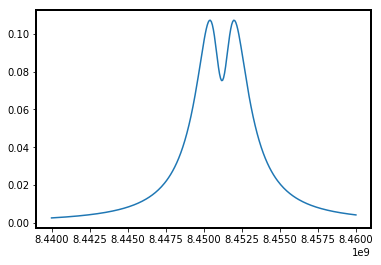

In [30]:
#qubit (a)
wq = 2*pi*8.4512e9
Aq = 2*pi*135e6
gamma = 2*pi*0.14e6 ##homogenous linewidth
gamma_phi = 2*pi*0.8e6 ##ihomogenous linewidth
Nl_spec = 5

#cavity (b)
wc = 2*pi*8.4512e9
kappa = 2*pi*3.133e6
kappa_out = 2*pi*1e6
kappa_in = 2*pi*0.333e6 
Nh_spec = 5
g = 2*pi*0.64e+6 ##coupling constant

chi = 1*pi*678e+3
power = -200 #low power limit

w_points = 300
wd_list = np.linspace(2*pi*8.44e9,2*pi*8.46e9,w_points)
sim = spectroscopy(wq,Aq,gamma,gamma_phi,Nl_spec,wc,kappa,kappa_out,kappa_in,Nh_spec,power,wd_list,chi,g)
plt.plot(wd_list/2/pi,sim)

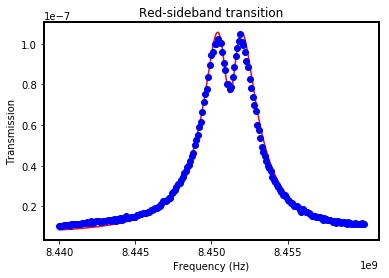

In [24]:
block = mydata[20]
plt.figure()
plt.plot(wd_list/2/pi,0.93e-6*sim+6e-9,'r-')
plt.plot(block['Frequency (Hz)'],block['S21_lin ()'],'bo')
# plt.xlim(8.445e9,8.457e9)
# plt.ylim(1.5e-4,3.5e-4) 
plt.xticks(np.arange(8.44e9,8.46e9, step=5e6))
plt.title('Red-sideband transition')
plt.xlabel('Frequency (Hz)')  
plt.ylabel('Transmission') 
plt.show()
plt.close()